<a href="https://colab.research.google.com/github/cakwok/CS6140-Machine-Learning/blob/main/2_3_Calculate_RME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CS6140 Assignment 1
Q2.3 Root Mean Square
Wing Man, Kwok
May 22 2022


In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [232]:
def compute_cost(ip, op, params):
    """
    Cost function in linear regression where the cost is calculated
    ip: input variables
    op: output variables
    params: corresponding parameters
    Returns cost
    """
    num_samples = len(ip)
    cost_sum = 0.0
    for x,y in zip(ip, op):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    
    cost = cost_sum / (num_samples)
    
    return cost

In [233]:
def linear_regression_using_batch_gradient_descent(ip, op, params, alpha, max_iter):
    """
    Compute the params for linear regression using batch gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    max_iter: maximum number of iterations
    Returns parameters, cost, params_store
    """ 
    # initialize iteration, number of samples, cost and parameter array
    iteration = 0
    num_samples = len(ip)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    ip_with_bias = np.c_[ np.ones(ip.size), ip]       #convert x variables with bias column all 1

    
    # Compute the cost and store the params for the corresponding cost
    while iteration < max_iter:

        #All calculation at a time, so it is batch. it won't arrive at faster computation nor accuracy, but computer resources require more because all data points are processed at a time 
        cost[iteration] = compute_cost(ip, op, params)  
        params_store[:, iteration] = params
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        for i in range(num_samples):
          y_hat = np.dot(params, np.array([1.0, ip[i]]))
          params += alpha/num_samples * (op[i] - y_hat) * np.array([1.0, ip[i]])

        iteration += 1

    return params, cost, params_store

In [234]:
def lin_reg_stoch_gradient_descent(ip, op, params, alpha):
    """
    Compute the params for linear regression using stochastic gradient descent
    ip: input variables
    op: output variables
    params: corresponding parameters
    alpha: learning rate
    Returns parameters, cost, params_store
    """

    # initialize iteration, number of samples, cost and parameter array
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    i = 0
    
    # Compute the cost and store the params for the corresponding cost
    for x,y in zip(input_var, output_var):
        cost[i] = compute_cost(input_var, output_var, params)
        params_store[:, i] = params
        
        print('--------------------------')
        print(f'iteration: {i}')
        print(f'cost: {cost[i]}')
        
        # Apply stochastic gradient descent (one calculation at a time, so it is stochastic)
        y_hat = np.dot(params, np.array([1.0, x]))  #np.array instead of purley ip[i], is because the whole ip[i] features have to be considered
        params += alpha/num_samples * (y - y_hat) * np.array([1.0, x]) 
          
        i += 1
    
    return params, cost, params_store

In [235]:
# Do not change the code in this cell
true_slope = 15
true_intercept = 2.4
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 300.0 * np.random.rand(len(input_var))

In [236]:
# Do not change the code in this cell
# Training the model
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

params_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3
max_iter = 100
params_hat_batch, cost_batch, params_store_batch =\
    linear_regression_using_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)

--------------------------
iteration: 0
cost: 12564842.958467815
--------------------------
iteration: 1
cost: 28770.2774139529
--------------------------
iteration: 2
cost: 12100.184467714362
--------------------------
iteration: 3
cost: 12088.666526842822
--------------------------
iteration: 4
cost: 12086.452303853244
--------------------------
iteration: 5
cost: 12083.760355834387
--------------------------
iteration: 6
cost: 12081.051084074974
--------------------------
iteration: 7
cost: 12078.342570680414
--------------------------
iteration: 8
cost: 12075.635482786496
--------------------------
iteration: 9
cost: 12072.929844232807
--------------------------
iteration: 10
cost: 12070.225655150298
--------------------------
iteration: 11
cost: 12067.52291479664
--------------------------
iteration: 12
cost: 12064.821622397676
--------------------------
iteration: 13
cost: 12062.12177717852
--------------------------
iteration: 14
cost: 12059.423378364629
------------------------

In [237]:
# Do not change the code in this cell
alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store =\
lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

--------------------------
iteration: 0
cost: 13003649.618837168
--------------------------
iteration: 1
cost: 13003664.1122163
--------------------------
iteration: 2
cost: 13004448.146187842
--------------------------
iteration: 3
cost: 13004076.086373625
--------------------------
iteration: 4
cost: 13002208.983840348
--------------------------
iteration: 5
cost: 12999792.699334037
--------------------------
iteration: 6
cost: 12993762.769097386
--------------------------
iteration: 7
cost: 12987029.07252635
--------------------------
iteration: 8
cost: 12980452.842482908
--------------------------
iteration: 9
cost: 12968839.612531755
--------------------------
iteration: 10
cost: 12951167.190745285
--------------------------
iteration: 11
cost: 12924182.451565728
--------------------------
iteration: 12
cost: 12902496.021680284
--------------------------
iteration: 13
cost: 12872213.642997945
--------------------------
iteration: 14
cost: 12832521.004132776
-----------------------

In [245]:
rmse_batch = 0;  rmse_SGD = 0;
for i in range(x_test.size):
  y_hat_batch = params_hat_batch[0] + params_hat_batch[1] * x_test[i] 
  y_hat_SGD = params_hat[0] + params_hat[1] * x_test[i] 
  rmse_batch += (y_hat_batch - y_test[i] )**2
  rmse_SGD += (y_test[i] - y_hat_SGD)**2

rmse_BatchGradientDescent = np.sqrt(rmse_batch/x_test.size)
rmse_SGD = np.sqrt(rmse_SGD/x_test.size)
print("batch rms:\t", rmse_BatchGradientDescent)
print("stochastic rms:\t", rmse_SGD)


batch rms:	 116.92642690633203
stochastic rms:	 156.05006493493576


cost_batch - cost function computed by batch gradient descent
cost - cost function computed by SGD

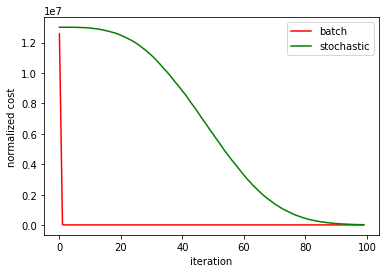

min cost with BGD: 11835.264951192166
min cost with SGD: 25803.971351024677


In [261]:
# Do not change the code in this cell
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')
